<a href="https://colab.research.google.com/github/riyadodthi/MSc-Project-LAPA/blob/main/4_MSc_Project_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data -  Weather and air quality for each day
weather_df = pd.read_csv("/content/drive/MyDrive/Exam/london_weather.csv")
quality_df = pd.read_csv("/content/drive/MyDrive/Exam/air-quality-london-time-of-day.csv")

#display(weather_df)
#quality_df.head(2)


In [3]:
# Data Cleaning
# Quality
df_qdate = quality_df.drop(columns='GMT') # drop time
df_qdate.fillna(0,inplace=True)  # fill NA
df_qdate['Month']=pd.to_datetime(df_qdate['Month'],yearfirst=True) # convert month col to date format

# Weather
df_w = weather_df
df_w.fillna(0,inplace=True)
#df_qdate

In [4]:
# Mean quality for each month
df_qdate_gr = df_qdate.set_index('Month')
df_qdate_gr = df_qdate_gr.groupby(pd.Grouper(freq='D'))
df_qdate_mean = df_qdate_gr.mean()

df_qdate_mean.dropna(inplace=True)
#df_qdate_mean

In [5]:
# Fix date format issue (from yyyy-dd-mm to yyyy-mm-dd)
date_month = pd.date_range(start='2008-01-01', end='2019-07-01', freq='MS') # genrate new date col for each month
df_qdate_mean['date'] = date_month
df_qdate_mean.set_index('date',inplace=True)
#df_qdate_mean

In [6]:
# Fix date format issue
date_range = pd.date_range(start='1979-01-01', end='2020-12-31', freq='D')
weather_df['date2'] = date_range

weather_df_new = weather_df.drop(columns='date')

# mean of weather
weather_df_new.set_index('date2',inplace=True)
df_wdate_gr = weather_df_new.groupby(pd.Grouper(freq='M'))
df_wdate_mean = df_wdate_gr.mean()

date_range_month = pd.date_range(start='1979-01-01', end='2020-12-01', freq='MS')
print(date_range_month.size)
df_wdate_mean['date'] = date_range_month
df_wdate_mean.set_index('date',inplace=True)


#display(df_wdate_mean)



504


In [7]:
# merge both ds based on date
df_merge = pd.merge(df_qdate_mean, df_wdate_mean, left_index=True, right_index=True)
df_merge.reset_index(inplace=True)

# Add columns for total roadside pollution and background pollution

df_merge['Total Roadside'] = df_merge.iloc[:,1:8].sum(axis=1)
df_merge['Total Background'] = df_merge.iloc[:,8:14].sum(axis=1)
df_merge.head(5)

,date,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),...,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside,Total Background
0,2008-01-01,0.0,55.512500,0.0,29.512500,24.970833,14.675000,4.216667,0.0,42.345833,...,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.000000,128.887500,101.679167
1,2008-02-01,0.0,75.925000,0.0,20.316667,39.487500,28.775000,7.554167,0.0,60.241667,...,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.000000,172.058333,125.275000
2,2008-03-01,0.0,55.600000,0.0,40.112500,21.570833,12.308333,3.870833,0.0,39.800000,...,2.764516,91.225806,10.587097,6.845161,3.719355,2.251613,100653.870968,0.000000,133.462500,107.783333
3,2008-04-01,0.0,61.758333,0.0,37.879167,28.750000,20.454167,4.475000,0.0,44.004167,...,4.676667,151.800000,13.660000,9.056667,5.190000,2.113333,101034.333333,0.133333,153.316667,119.104167
4,2008-05-01,0.0,62.912500,0.0,46.270833,34.620833,27.500000,4.629167,0.0,44.133333,...,5.245161,182.225806,19.751613,14.641935,10.454839,2.070968,101490.322581,0.000000,175.933333,138.445833


In [8]:
df_roadside = df_merge.iloc[:,14:24]
df_bckgrnd = df_merge.iloc[:,14:23]
df_bckgrnd['Total Background'] = df_merge.iloc[:,24]
#df_roadside['Total roadside'] = df_merge.iloc[:,23]
df_roadside

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside
0,5.419355,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.000000,128.887500
1,3.724138,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.000000,172.058333
2,5.645161,2.764516,91.225806,10.587097,6.845161,3.719355,2.251613,100653.870968,0.000000,133.462500
3,4.700000,4.676667,151.800000,13.660000,9.056667,5.190000,2.113333,101034.333333,0.133333,153.316667
4,4.677419,5.245161,182.225806,19.751613,14.641935,10.454839,2.070968,101490.322581,0.000000,175.933333
...,...,...,...,...,...,...,...,...,...,...
134,5.548387,3.838710,103.806452,13.229032,9.483871,5.845161,1.600000,101650.645161,0.000000,235.562500
135,4.600000,5.670000,163.800000,15.923333,10.736667,5.700000,0.426667,101407.666667,0.000000,261.975000
136,5.032258,5.687097,194.161290,18.838710,13.448387,8.361290,1.161290,101714.838710,0.000000,219.187500
137,5.433333,5.670000,166.266667,21.670000,16.893333,11.923333,2.726667,101446.333333,0.000000,188.487500


In [9]:
df_bckgrnd['date'] = df_merge['date']
df_bckgrnd.set_index('date', inplace=True)
display(df_bckgrnd.head(2))
display(df_bckgrnd.tail(2))


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Background
date,,,,,,,,,,
2008-01-01,5.419355,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.0,101.679167
2008-02-01,3.724138,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.0,125.275000


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Background
date,,,,,,,,,,
2019-06-01,5.433333,5.670000,166.266667,21.670000,16.893333,11.923333,2.726667,101446.333333,0.0,117.025
2019-07-01,4.806452,6.274194,191.290323,25.574194,20.180645,14.909677,1.638710,101598.387097,0.0,114.800


In [10]:
from IPython.testing import test
train_end_date = '2017-02-01'  # Specify the end date for training
test_start_date = '2017-02-01'  # Specify the start date for testing

# Split the data into training and testing sets
train_data = df_bckgrnd.loc[:train_end_date]
test_data = df_bckgrnd.loc[test_start_date:]


In [11]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(train_data['Total Background'], model='additive')


In [12]:
p, d, q, P, D, Q, S = 3,2,3,1,1,2,12
order = (p, d, q)  # Autoregressive (p), Integration (d), Moving Average (q) order
seasonal_order = (P, D, Q, S)  # Seasonal Autoregressive (P), Seasonal Integration (D), Seasonal Moving Average (Q), Seasonal Period (S)

sarima_model = sm.tsa.SARIMAX(train_data['Total Background'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
#sarima_results.plot_diagnostics()


In [18]:
forecast_steps = 30  # Number of steps to forecast
forecast = sarima_results.get_forecast(steps=forecast_steps)


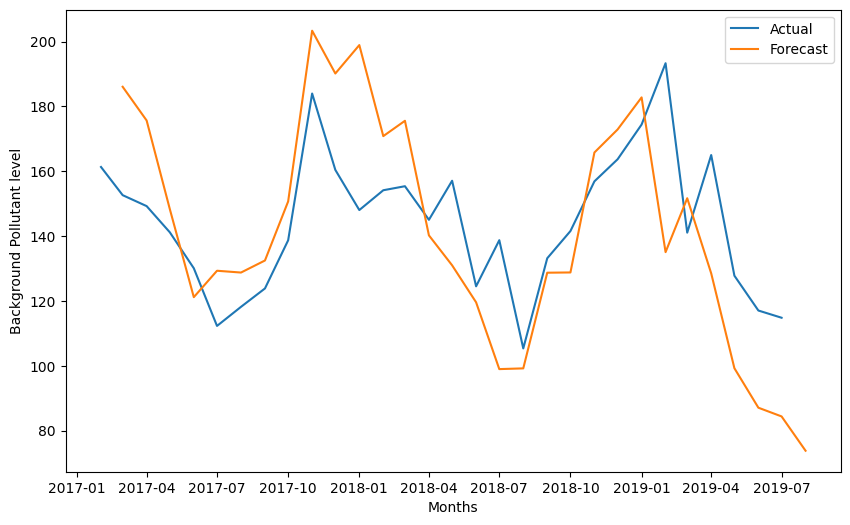

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data['Total Background'], label='Actual')
plt.ylabel("Background Pollutant level")
plt.xlabel("Months")
#plt.plot(sarima_results.fittedvalues, label='Fitted')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error

forecasted_val = forecast.predicted_mean
actual = test_data['Total Background']

rmse = np.sqrt(mean_squared_error(actual, forecasted_val))

re = (abs(np.sum(forecasted_val-actual))/np.sum(actual))*100


print("RMSE:", rmse)
print("RE:", re)

RMSE: 30.225808692861715
RE: 0.05616193093164726
